## Scikit-learn (sklearn)

### Primera aplicación, clasificación de "irises"
<span><img src="http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png" alt="drawing" style="width: 200px;"/> <img src="http://www.spataru.at/iris-dataset-svm/iris_types.jpg" alt="drawing" style="width: 500px;"/></span>

El dataset Fisher's Iris es un conjunto de datos multivariado introducido por Ronald Fisher en su paper de 1936 *The use of multiple measurements in taxonomic problems* como un ejemplo de análisis discriminante lineal.



In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris_dataset = load_iris()

#### Paso 0: exploración del objeto ```iris_dataset```


In [2]:
print("Componentes del iris_dataset: {}".format(iris_dataset.keys()))
print("Nombres de categorías a aprender (target): {}".format(iris_dataset['target_names']))
print("Nombres de features: {}".format(iris_dataset['feature_names']))
print("Dimensión de los datos: {}".format(iris_dataset['data'].shape))
print("Primeras 5 filas:\n{}".format(iris_dataset['data'][:5]))
print("Dimensión del target: {}".format(iris_dataset['target'].shape))
print("Target primeras 5 filas:\n{}".format(iris_dataset['target'][:5]))
print("Target últimas 5 filas:\n{}".format(iris_dataset['target'][-5:]))

print(iris_dataset.DESCR)

Componentes del iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Nombres de categorías a aprender (target): ['setosa' 'versicolor' 'virginica']
Nombres de features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dimensión de los datos: (150, 4)
Primeras 5 filas:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Dimensión del target: (150,)
Target primeras 5 filas:
[0 0 0 0 0]
Target últimas 5 filas:
[2 2 2 2 2]
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary St

#### Paso 1: División de datos (training - testing)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.3)

print("X_train dimensión: {}".format(X_train.shape))
print("y_train dimensión: {}".format(y_train.shape))

print("X_test dimensión: {}".format(X_test.shape))
print("y_test dimensión: {}".format(y_test.shape))

X_train dimensión: (105, 4)
y_train dimensión: (105,)
X_test dimensión: (45, 4)
y_test dimensión: (45,)


#### Paso 2: Exploración de los datos


In [4]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,2.0,3.5,1.0
1,6.5,3.0,5.5,1.8
2,6.7,3.3,5.7,2.5
3,6.0,2.2,5.0,1.5
4,6.7,2.5,5.8,1.8
5,5.6,2.5,3.9,1.1
6,7.7,3.0,6.1,2.3
7,6.3,3.3,4.7,1.6
8,5.5,2.4,3.8,1.1
9,6.3,2.7,4.9,1.8


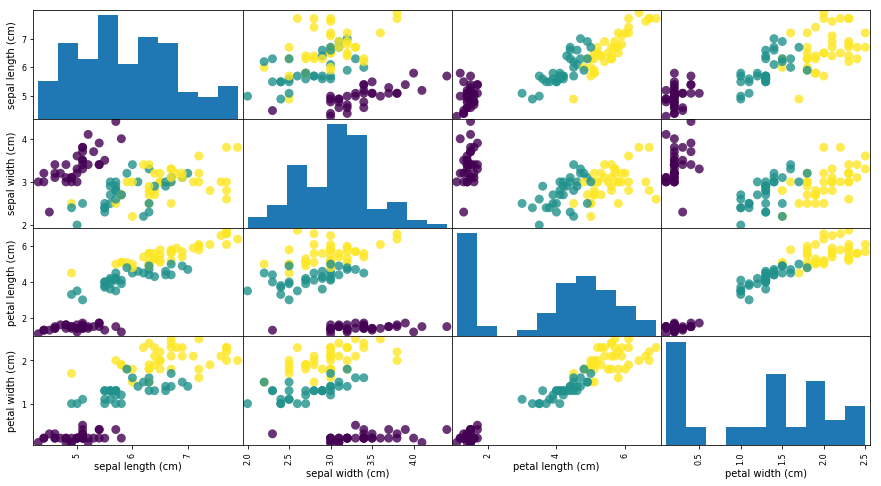

In [5]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, s=80, figsize=(15, 8), marker='o', alpha=.8);

### los hostogramas podrian ser utiles si distinguimos entre clases

#### Paso 3: Construcción de un modelo (decision tree)

In [6]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, criterion="gini")
#arbol
arbol.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Paso 4: Predecir

In [7]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))


X_new.shape: (1, 4)


In [8]:
prediction = arbol.predict(X_new)
print("Predicción: {}".format(prediction))
print("Nombre del target predicho: {}".format(
       iris_dataset['target_names'][prediction]))

Predicción: [0]
Nombre del target predicho: ['setosa']


#### Paso 5: Evaluación del modelo

In [9]:
y_pred = arbol.predict(X_test)

print("Predicciones sobre el test set:\n {}".format(y_pred))
print("Score sobre el test set: {:.2f}".format(np.mean(y_pred == y_test))) # A mano
print("Score sobre el test set: {:.2f}".format(arbol.score(X_test, y_test))) # usando el método score.

print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=iris_dataset['target_names'], index=iris_dataset['target_names']))

Predicciones sobre el test set:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Score sobre el test set: 0.98
Score sobre el test set: 0.98
Matriz de confusión:


,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,17,1
virginica,0,0,11


### En resumen


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=1234, test_size=0.1)

arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")
arbol.fit(X_train, y_train)

print("Score sobre el training set: {:.2f}".format(arbol.score(X_train, y_train)), "¿para qué sirve este número?")
print("Score sobre el test set: {:.2f}".format(arbol.score(X_test, y_test)))


Score sobre el training set: 0.97 ¿para qué sirve este número?
Score sobre el test set: 1.00


### Ejercicios Árboles de Decisión: 

1. Resolver el problema anterior utilizando árboles de decisión de sklearn.
1. Graficar el árbol obtenido (ver función `dibujar_arbol`). 
1. Probar distintos valores para: `max_depth` y graficar la performance sobre test al variar este parámetro. 
1. ¿Qué ocurre con la performance con el valor testeando sobre train? 
1. ¿Cuál es el máximo valor de profundidad que se alcanza? ¿por qué? 
1. ¿Qué ocurre si cambiamos el parámetro `splitter` a `splitter="random"`? ¿Qué profundidad se alcanza?
1. Plotear la importancia de features para cualquiera de los clasificadores encontrados. 

In [18]:
import sklearn.tree 
sklearn.tree.DecisionTreeClassifier?

In [19]:
# !pip install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from sklearn.externals.six import StringIO  
from IPython.display import Image, display
import pydotplus

    
def dibujar_arbol(clf):
    dot_data = StringIO()
    sklearn.tree.export_graphviz(clf, out_file=dot_data,  
                    filled=True, 
                    class_names = iris_dataset.target_names,
                    feature_names=iris_dataset.feature_names,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [23]:
!pip3 install pydotplus

In [25]:
dibujar_arbol(arbol)


InvocationException: GraphViz's executables not found